<a href="https://colab.research.google.com/github/dtg-ca/DataScience-the-journey-begins/blob/master/NLP_tf_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

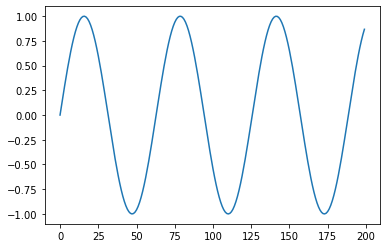

In [4]:
series = np.sin(0.1* np.arange(200))

plt.plot(series)
plt.show()

In [5]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape, N)

(190, 10, 1) (190,) 190


In [6]:
i = Input(shape=(T,1))
x = SimpleRNN(5, activation = None)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
             loss = 'mse',
              optimizer = Adam(lr =0.1)
              )
r = model.fit(
             X[:-N//2], Y[:-N//2],
              validation_data = (X[-N//2:], Y[-N//2:]),
              epochs = 80,
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
3/3 [==============================] - 1s 127ms/step - loss: 1.0643 - val_loss: 0.0183
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0199 - val_loss: 0.0416
Epoch 3/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0521 - val_loss: 0.0552
Epoch 4/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0560 - val_loss: 0.0473
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0561 - val_loss: 0.0432
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0366 - val_loss: 0.0122
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0157 - val_loss: 0.0118
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0149 - val_loss: 0.0290
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0425 - val_loss: 0.1205
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.1544 - val_loss: 0.0081
Epoch 11/80
3/3 [===========

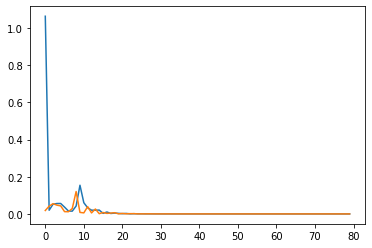

In [7]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [8]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1, 1))[0,0]
  i += 1
  validation_predictions.append(p)

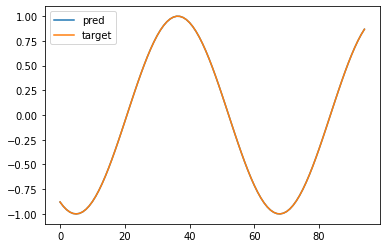

In [9]:
plt.plot(validation_predictions, label = 'pred')
plt.plot(validation_target, label = 'target')
plt.legend()

In [10]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1, 1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

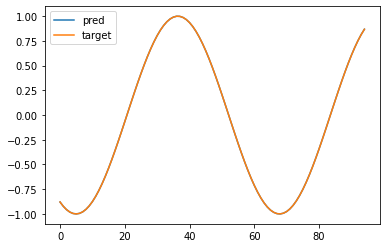

In [11]:
plt.plot(validation_predictions, label = 'pred')
plt.plot(validation_target, label = 'target')
plt.legend()